<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Source: openml & UCI
### Initial format: ARFF

#### The Iris dataset, introduced by Fisher in 1936, is one of the most classic and earliest datasets used for evaluating classification methods in statistics and machine learning. This tabular dataset, rooted in biology, consists of 150 instances representing three classes of iris plants, with 50 instances per class. Each instance is characterized by four real-valued features, making it a simple yet foundational domain for classification tasks. One class is linearly separable from the other two, while the latter two are not linearly separable from each other. The dataset is widely recognized for its historical significance and remains a benchmark for testing classification algorithms. Notably, there are minor discrepancies in the dataset compared to Fisher's original article, with specific errors identified in the 35th and 38th samples. Despite these small inconsistencies, the dataset is complete, with no missing values, and continues to be a valuable resource for learning and research in data science.

In [ ]:
import os

# Path to the .arff file
path_to_file = "/content/iris.arff"

def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Process the single .arff file
with open(path_to_file, "r") as inFile:
    content = inFile.readlines()
    name, ext = os.path.splitext(inFile.name)
    new = toCsv(content)
    with open(name + ".csv", "w") as outFile:
        outFile.writelines(new)

##import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## set-up

In [ ]:
purple_colors = ['#4B0082', '#800080', '#9370DB', '#8A2BE2', '#9400D3']

df = pd.read_csv('iris.csv', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## EDA

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


<ipython-input-14-1cd685ee4177>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette=purple_colors)
<ipython-input-14-1cd685ee4177>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='species', data=df, palette=purple_colors)


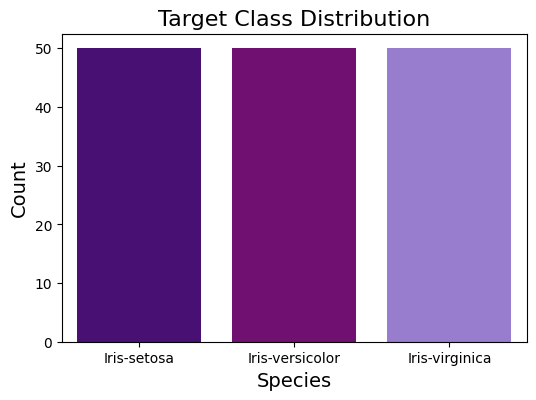

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette=purple_colors)
plt.title('Target Class Distribution', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seabo

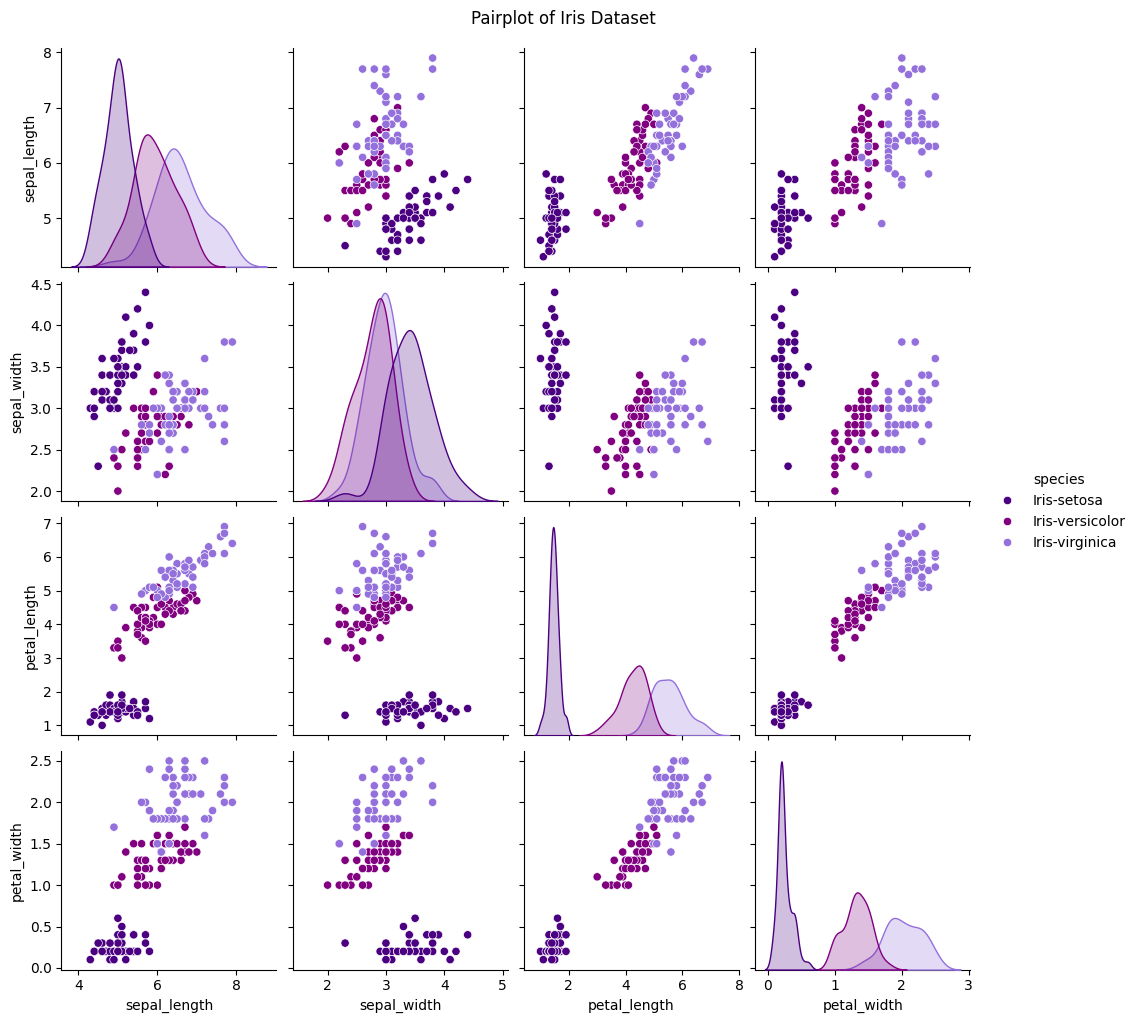

In [ ]:
sns.pairplot(df, hue='species', palette=purple_colors)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

In [ ]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


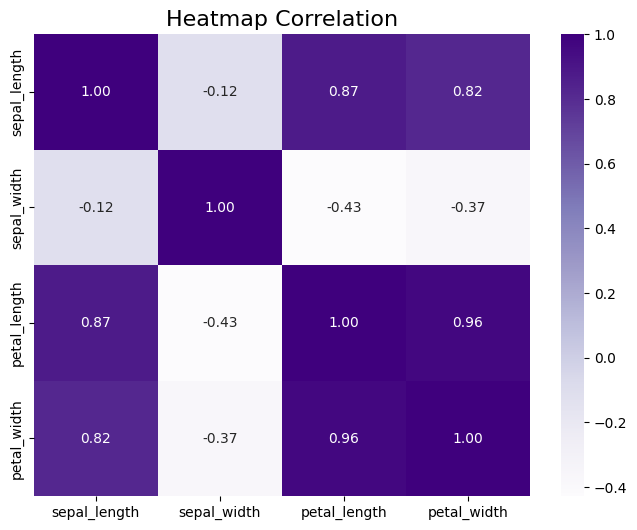

In [ ]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Heatmap Correlation', fontsize=16)
plt.show()

## preprocessing

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## modelling

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-' * 40)

Logistic Regression Accuracy: 1.0000
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

----------------------------------------
Decision Tree Accuracy: 1.0000
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

-------------

<ipython-input-26-b378d043d51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette=purple_colors)


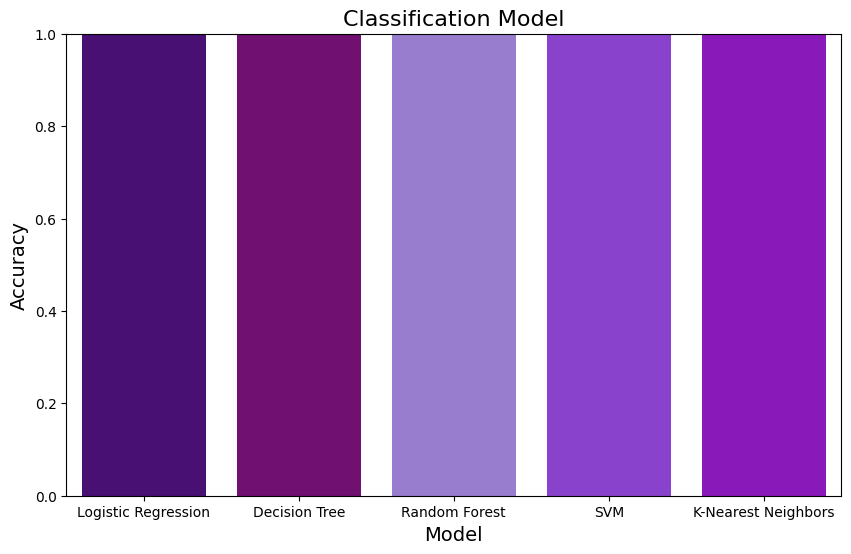

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette=purple_colors)
plt.title('Classification Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0)
plt.show()